# ML Tests

This notebook contains a small experiment with ML I wanted to run using some classifier.

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

import pathlib
import multiprocessing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ecodam_py.bedgraph import BedGraphAccessor, put_dfs_on_even_grounds
from ecodam_py.ml_pipeline import ml_pipeline
from ecodam_py.eco_atac_normalization import *

<IPython.core.display.Javascript object>

## Preprocessing

In [2]:
chromatin = read_bedgraph(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Michael/Chromatin_rep1/filtered_xmap/pipeline_bedgraphs/NoBlackMask/Chromatin_WholeGenome.bedgraph"
)
theo = read_bedgraph(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Theoretical_EcoDam/New folder/Hg38.EcoDam.insilico.canonical.keynames.bg_smoothed_7kb_resampled_with_700_overlapping_bp.bedgraph"
)
theo = theo.replace("chr23", "chrX")
naked = read_bedgraph(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Hagai/Naked_WholeGenome.bedgraph"
)
nfr = read_bedgraph(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Hagai/ENCFF240YRV.sorted.bedgraph"
)

<IPython.core.display.Javascript object>

Equalize loci of the three datasets, per chromosome:

In [3]:
chromatingb = chromatin.groupby("chr", as_index=False)
nakedgb = naked.groupby("chr", as_index=False)
theogb = theo.groupby("chr", as_index=False)
grouped = (
    (chrom, nakedgb.get_group(chr_), theogb.get_group(chr_), nfr.query("chr == @chr_"))
    for chr_, chrom in chromatingb
)
with multiprocessing.Pool(6) as pool:
    result = pool.starmap(ml_pipeline, grouped)

/home/hagaih/miniconda3/envs/ecodam/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/hagaih/miniconda3/envs/ecodam/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/hagaih/miniconda3/envs/ecodam/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/home/hagaih/miniconda3/envs/ecodam/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/hagaih/miniconda3/envs/ecodam/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<IPython.core.display.Javascript object>

In [4]:
result[0][1]

,chr,start_locus,end_locus,intensity
group,,,,
0,chr1,0,9950,0
1,chr1,9950,10100,14
2,chr1,10100,10550,0
3,chr1,10550,10700,6
5,chr1,41550,41650,2
...,...,...,...,...
537968,chr1,219292950,219293600,0
537969,chr1,219293600,219293750,2
537970,chr1,219293750,219293800,0


<IPython.core.display.Javascript object>

<AxesSubplot:>

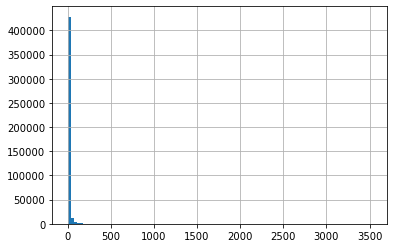

<IPython.core.display.Javascript object>

In [10]:
result[0][1].intensity.hist(bins=100)